#Assignment 2




##1) set a seed (to ensure work reproducibility) and take a random sample of  25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison

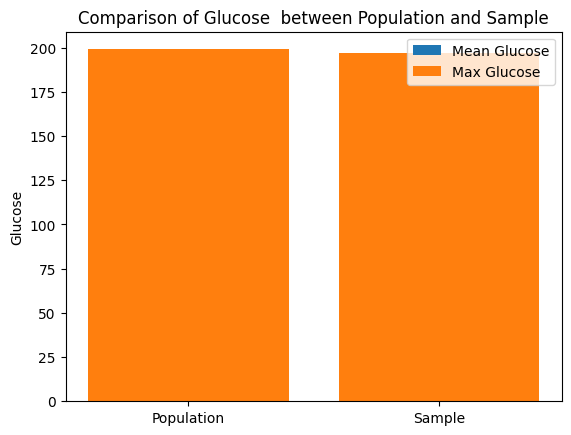

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(123)

data = pd.read_csv("/content/diabetes.csv")

sample = data.sample(n=25)
sample_mean_glucose = sample["Glucose"].mean()
sample_max_glucose = sample["Glucose"].max()

pop_mean_glucose = data["Glucose"].mean()
pop_max_glucose = data["Glucose"].max()

fig, ax = plt.subplots()
ax.bar(["Population", "Sample"], [pop_mean_glucose, sample_mean_glucose], label="Mean Glucose")
ax.bar(["Population", "Sample"], [pop_max_glucose, sample_max_glucose], label="Max Glucose")
ax.set_ylabel("Glucose")
ax.set_title("Comparison of Glucose  between Population and Sample")
ax.legend()
plt.show()


## 2) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

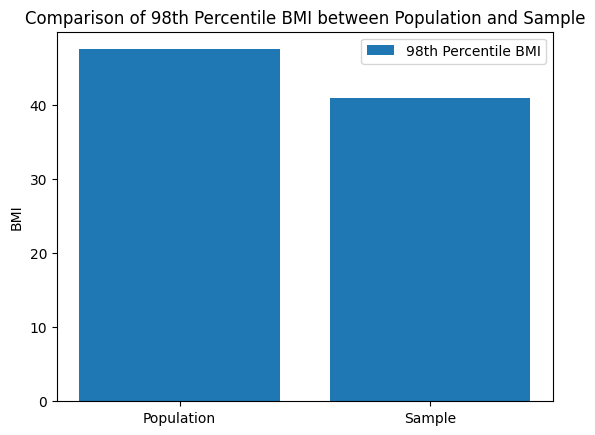

In [ ]:
sample_98_percentile = np.percentile(data["BMI"].sample(n=25), 98)
pop_98_percentile = np.percentile(data["BMI"], 98)

fig, ax = plt.subplots()
ax.bar(["Population", "Sample"], [pop_98_percentile, sample_98_percentile], label="98th Percentile BMI")
ax.set_ylabel("BMI")
ax.set_title("Comparison of 98th Percentile BMI between Population and Sample")
ax.legend()
plt.show()


##3) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings

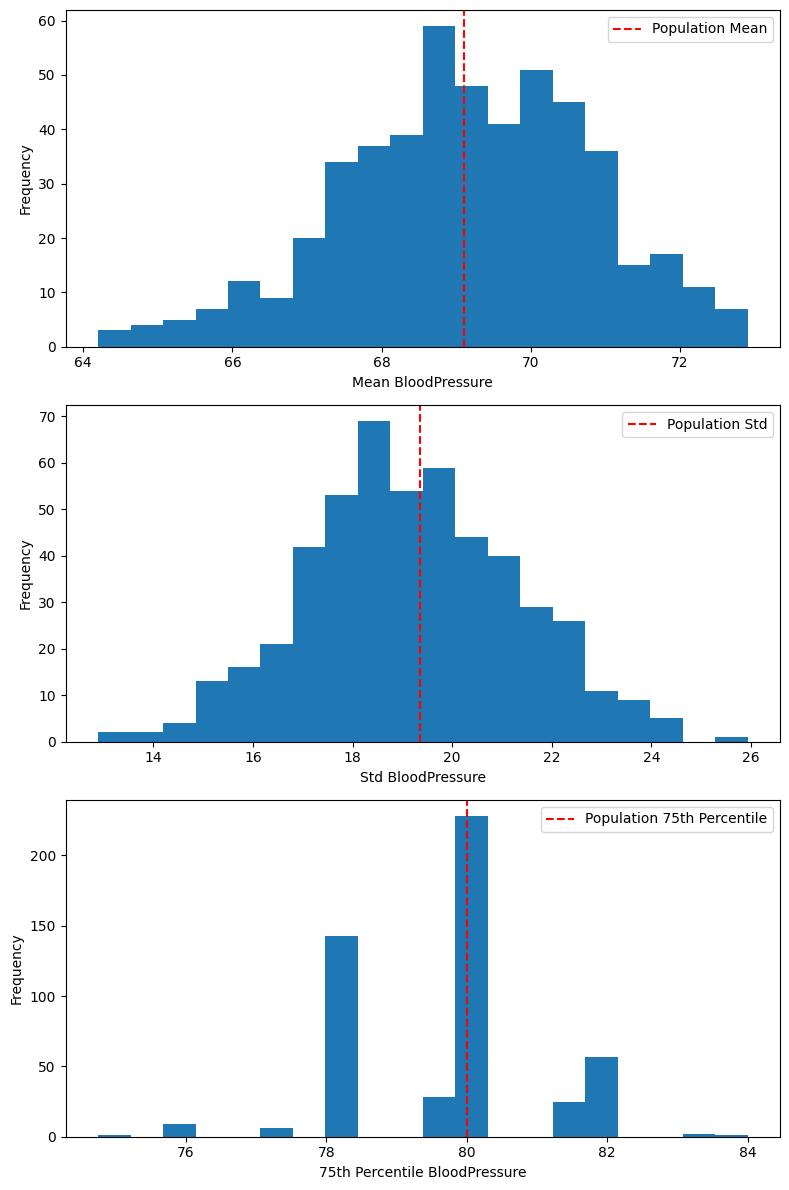

In [3]:
n_samples = 500
sample_size = 150

sample_means = np.zeros(n_samples)
sample_stds = np.zeros(n_samples)
sample_percentiles = np.zeros(n_samples)

def bootstrap_sample(data):
    return data.sample(n=len(data), replace=True)

for i in range(n_samples):
    sample = data["BloodPressure"].sample(n=sample_size, replace=True)
    sample_means[i] = sample.mean()
    sample_stds[i] = sample.std()
    sample_percentiles[i] = np.percentile(sample, 75)

pop_mean_bp = data["BloodPressure"].mean()
pop_std_bp = data["BloodPressure"].std()
pop_percentile_bp = np.percentile(data["BloodPressure"], 75)

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# vals = [{
#     'idx':0,

# }]

# for i in range(3):

axes[0].hist(sample_means, bins=20)
axes[0].axvline(pop_mean_bp, color="red", linestyle="--", label="Population Mean")
axes[0].set_xlabel("Mean BloodPressure")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].hist(sample_stds, bins=20)
axes[1].axvline(pop_std_bp, color="red", linestyle="--", label="Population Std")
axes[1].set_xlabel("Std BloodPressure")
axes[1].set_ylabel("Frequency")
axes[1].legend()

axes[2].hist(sample_percentiles, bins=20)
axes[2].axvline(pop_percentile_bp, color="red", linestyle="--", label="Population 75th Percentile")
axes[2].set_xlabel("75th Percentile BloodPressure")
axes[2].set_ylabel("Frequency")
axes[2].legend()

plt.tight_layout()
plt.show()
